# $$\color{red}{\text{Machine Learning}}$$

$$\color{orange}{\text{Overfitting \& Underfitting}}$$

$$\color{lime}{\text{Alireza Javid - 810198375}}$$

## $\color{deepskyblue}{\text{Import Libraries}}$

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## $\color{deepskyblue}{\text{Data Generation}}$

In [5]:
x = np.arange(-10,10,0.2)
Y = 2*np.cos(x)/-np.pi + (2*x)/(2*np.pi)+2*np.cos(3*x)/(-3*np.pi)
y1 = Y + 0.1*np.random.standard_normal()
y2 = Y + 0.1*np.random.poisson(0.5)

# $\color{deepskyblue}{\text{Gaussian Noise}}$

## $\color{deepskyblue}{\text{Select the Best and the Worst Polynomial}}$
In this part, we compare every polynomial based on their MSE errors.

In [6]:
from sklearn.metrics import mean_squared_error
model = []
for degree in range(1,16):
  model.append(np.poly1d(np.polyfit(x, y1, degree)))
  
mse = []
for m in model:
    y_pred = m(x)
    mse.append(mean_squared_error(y1, y_pred))

In [7]:
print("The best model for gaussian noise is the polynomial with degree: " + str(np.argmin(mse) + 1))
print("The worst model for gaussian noise is the polynomial with degree: " + str(np.argmax(mse) + 1))

The best model for gaussian noise is the polynomial with degree: 15
The worst model for gaussian noise is the polynomial with degree: 1


## $\color{deepskyblue}{\text{Plot the Results}}$
We've used $np.polyfit(x, y, degree)$ to fit polynomial with degree of $n$ to the given data points.

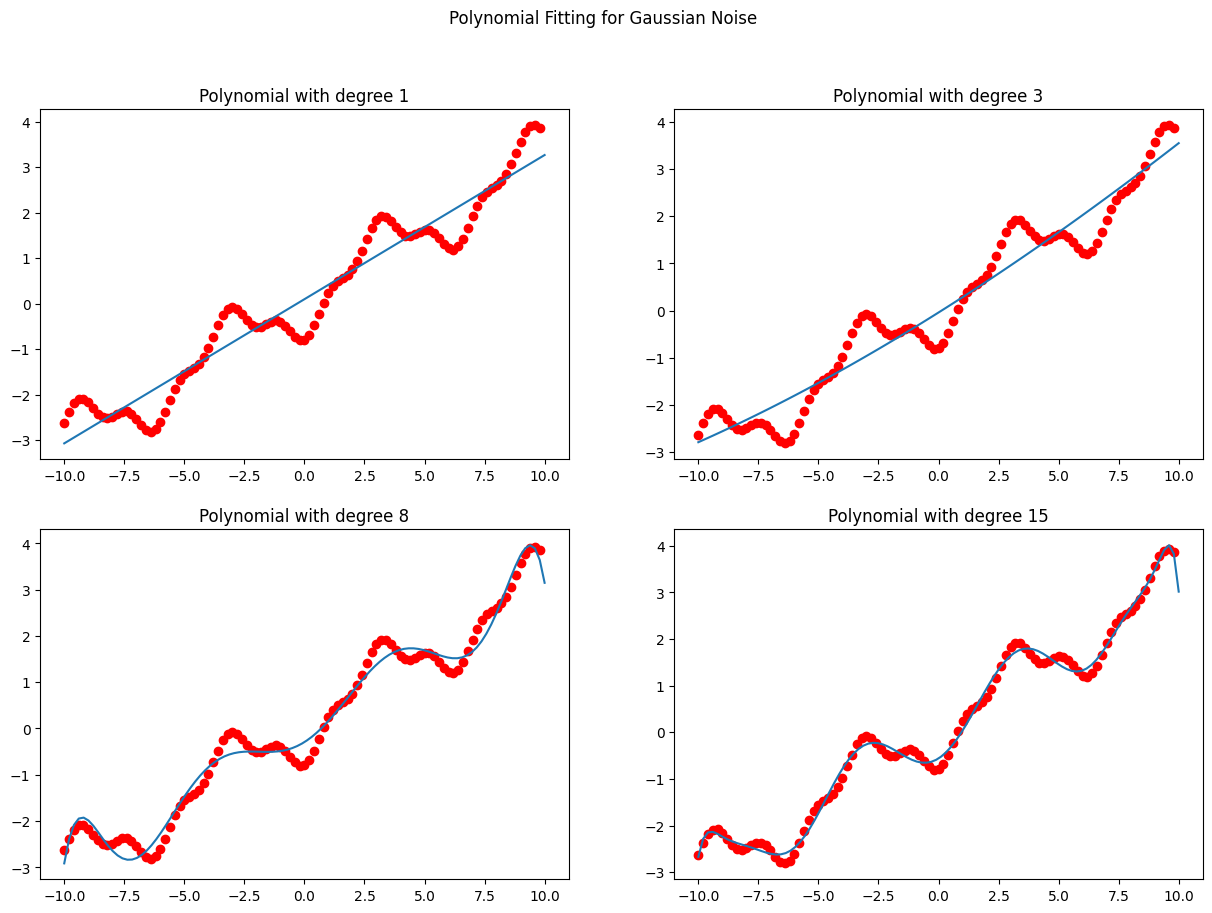

In [8]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
i, j=0, 0
for degree in [1, 3, 8, 15]:
  model = np.poly1d(np.polyfit(x, y1, degree))
  myline = np.linspace(-10, 10, 100)
  axes[j][i].scatter(x, y1, color="red")
  axes[j][i].plot(myline, model(myline))
  axes[j][i].set_title("Polynomial with degree " + str(degree))
  i+=1
  if i==2: 
    j+=1
    i=0
fig.suptitle("Polynomial Fitting for Gaussian Noise")
plt.show()


In [9]:
for degree in [1, 3, 8, 15]:
  print("MSE for polynomial with degree " + str(degree) + " (gaussian noise): " + str(mse[degree - 1]))

MSE for polynomial with degree 1 (gaussian noise): 0.24088052398325996
MSE for polynomial with degree 3 (gaussian noise): 0.22513775807574699
MSE for polynomial with degree 8 (gaussian noise): 0.057844381402034725
MSE for polynomial with degree 15 (gaussian noise): 0.018704970900074013


## $\color{deepskyblue}{\text{Bias-Varience Trade off}}$
We use monte-carlo method to depict changing the Bias and Varience errors with n. As you know base of the randomness of noise, our polynomial functions are random variable. Thus we simulate 100 experiment and calculate the average of them for more accuracy. Here's the general approach:

    1. Split the dataset into a training set and a test set.
    2. For each degree of polynomial (1 to 15 in your case):
        a. Fit a polynomial model on the training set.
        b. Calculate the predictions for both the training and test set using the model.
        c. Calculate the bias and variance errors for the model.
    3. Plot the bias and variance errors for each degree of polynomial.

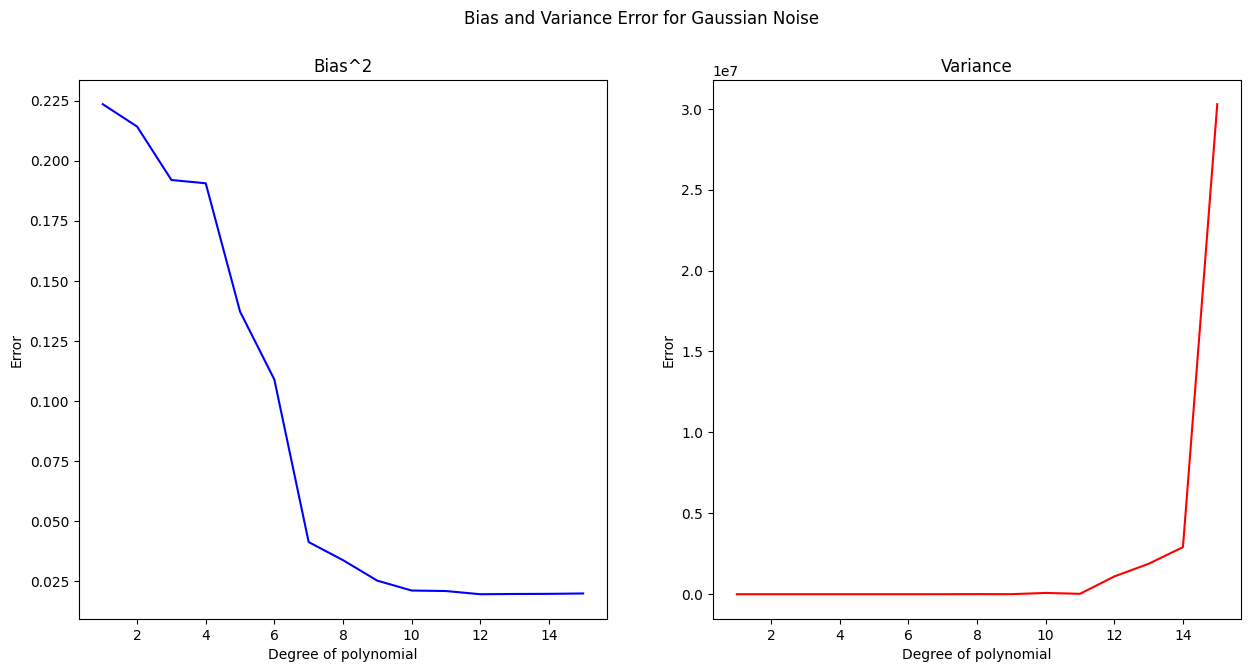

In [10]:
# Split the data into training and test sets
train_size = int(0.8 * len(x))
x_train, y_train = x[:train_size], y1[:train_size]
x_test, y_test = x[train_size:], y1[train_size:]

degrees = range(1, 16)
bias_squared = np.zeros(len(degrees))
variance = np.zeros(len(degrees))

num_simulations = 100
for i in range(num_simulations):
    y_noise = 0.1 * np.random.standard_normal(len(x))

    y_train_noisy = y_train + y_noise[:train_size]
    y_test_noisy = y_test + y_noise[train_size:]

    for j, degree in enumerate(degrees):
        model = np.poly1d(np.polyfit(x_train, y_train_noisy, degree))

        y_train_pred = model(x_train)
        y_test_pred = model(x_test)

        bias_squared[j] += np.mean((y_train - y_train_pred) ** 2)
        variance[j] += np.mean((y_test_pred - np.mean(y_test_pred)) ** 2)

bias_squared /= num_simulations
variance /= num_simulations

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].plot(degrees, bias_squared, color='b')
axes[0].set_title('Bias^2')
axes[1].plot(degrees, variance, color='r')
axes[1].set_title('Variance')
axes[0].set_xlabel('Degree of polynomial')
axes[1].set_xlabel('Degree of polynomial')
axes[0].set_ylabel('Error')
axes[1].set_ylabel('Error')
fig.suptitle("Bias and Variance Error for Gaussian Noise")
plt.show()

# $\color{deepskyblue}{\text{Poisson Noise}}$

We do exactly the same for the exponetial noise. Note that rusalts for this noise is quiet similar to previous one.

## $\color{deepskyblue}{\text{Select the Best and the Worst Polynomial}}$

In [11]:
from sklearn.metrics import mean_squared_error
model = []
for degree in range(1,16):
  model.append(np.poly1d(np.polyfit(x, y2, degree)))
  
mse = []
for m in model:
    y_pred = m(x)
    mse.append(mean_squared_error(y2, y_pred))

In [12]:
print("The best model for poisson noise is the polynomial with degree: " + str(np.argmin(mse) + 1))
print("The worst model for poisson noise is the polynomial with degree: " + str(np.argmax(mse) + 1))

The best model for poisson noise is the polynomial with degree: 15
The worst model for poisson noise is the polynomial with degree: 1


## $\color{deepskyblue}{\text{Plot the Results}}$

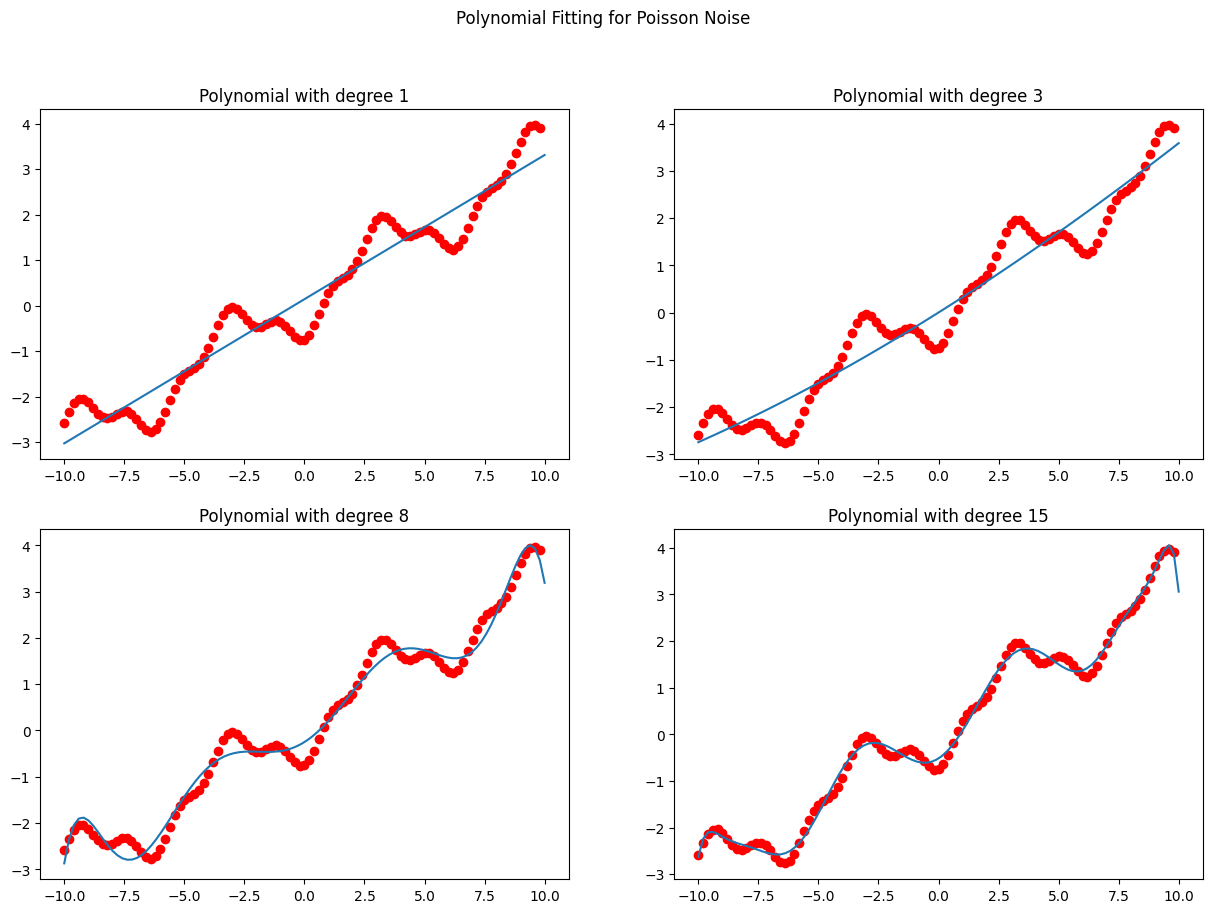

In [16]:
fig, axes = plt.subplots(2,2, figsize=(15,10))
i, j=0, 0
for degree in [1, 3, 8, 15]:
  model = np.poly1d(np.polyfit(x, y2, degree))
  myline = np.linspace(-10, 10, 100)
  axes[j][i].scatter(x, y2, color="red")
  axes[j][i].plot(myline, model(myline))
  axes[j][i].set_title("Polynomial with degree " + str(degree))
  i+=1
  if i==2: 
    j+=1
    i=0
fig.suptitle("Polynomial Fitting for Poisson Noise")
plt.show()

In [17]:
for degree in [1, 3, 8, 15]:
  print("MSE for polynomial with degree " + str(degree) + " (poisson noise): " + str(mse[degree - 1]))

MSE for polynomial with degree 1 (poisson noise): 0.24088052398325988
MSE for polynomial with degree 3 (poisson noise): 0.22513775807574696
MSE for polynomial with degree 8 (poisson noise): 0.05784438140203445
MSE for polynomial with degree 15 (poisson noise): 0.01870497090007399


## $\color{deepskyblue}{\text{Bias-Varience Trade off}}$

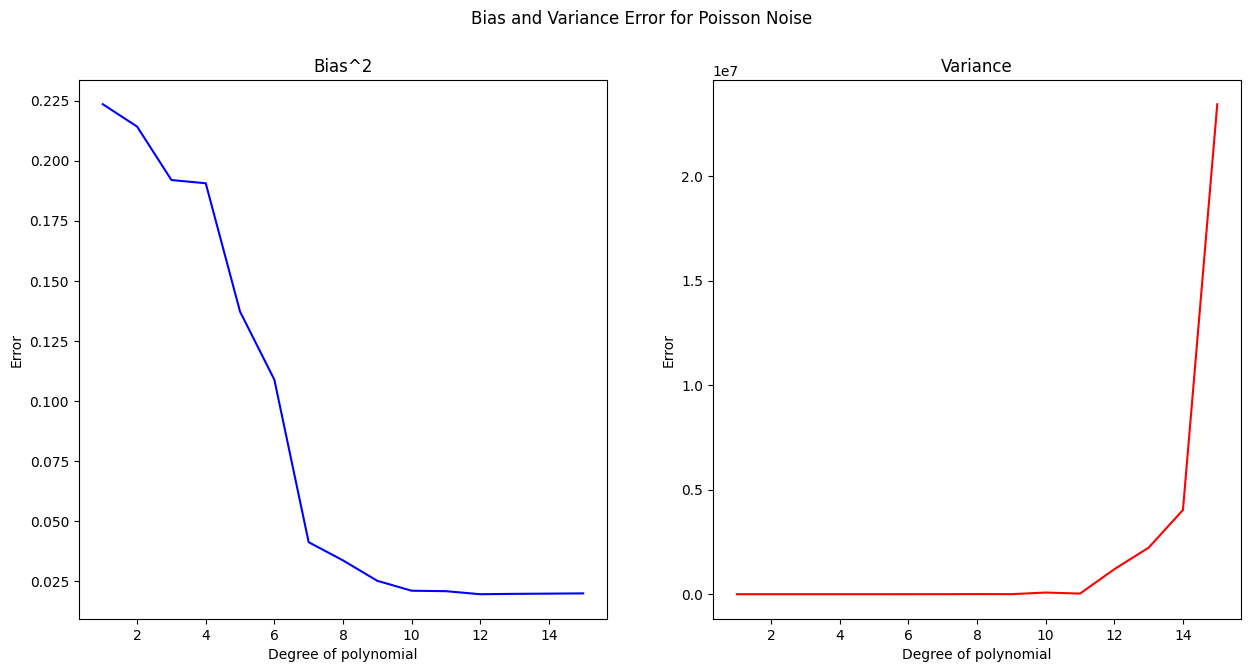

In [18]:
# Split the data into training and test sets
train_size = int(0.8 * len(x))
x_train, y_train = x[:train_size], y2[:train_size]
x_test, y_test = x[train_size:], y2[train_size:]

degrees = range(1, 16)
bias_squared = np.zeros(len(degrees))
variance = np.zeros(len(degrees))

num_simulations = 100
for i in range(num_simulations):
    y_noise = 0.1 * np.random.standard_normal(len(x))

    y_train_noisy = y_train + y_noise[:train_size]
    y_test_noisy = y_test + y_noise[train_size:]

    for j, degree in enumerate(degrees):
        model = np.poly1d(np.polyfit(x_train, y_train_noisy, degree))

        y_train_pred = model(x_train)
        y_test_pred = model(x_test)

        bias_squared[j] += np.mean((y_train - y_train_pred) ** 2)
        variance[j] += np.mean((y_test_pred - np.mean(y_test_pred)) ** 2)

bias_squared /= num_simulations
variance /= num_simulations

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].plot(degrees, bias_squared, color='b')
axes[0].set_title('Bias^2')
axes[1].plot(degrees, variance, color='r')
axes[1].set_title('Variance')
axes[0].set_xlabel('Degree of polynomial')
axes[1].set_xlabel('Degree of polynomial')
axes[0].set_ylabel('Error')
axes[1].set_ylabel('Error')
fig.suptitle("Bias and Variance Error for Poisson Noise")
plt.show()